가장 활용이 많이 되는 CNN중 한 가지

여러가지 버전이 있지만 기본적인 외형은 여러가지 방향으로 풀었다 다시 묶는 그림

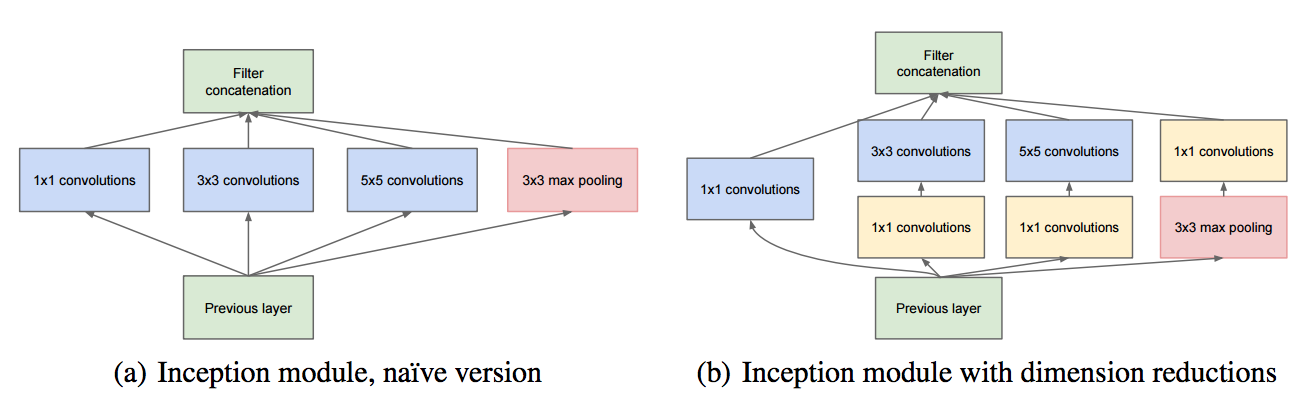

위와 같은 stem을 여러개 연결시켜 모형을 완성한다.

전체적인 틀은 이렇게 된다.
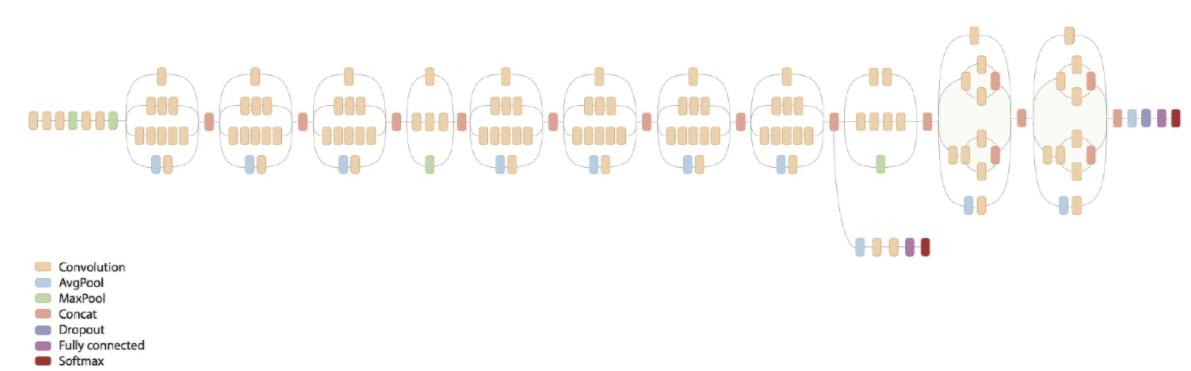

버전이 올라가면서 주축이 되는 점은 연산량과 속도에 대한 문제이다.  
5x5 이상의 Conv창을 여러개의 3x3창으로 교체하면서 연산을 줄이기도 하고,
1xN, Nx1의 형태로 변환시키는 방법을 사용하기도 한다.  
이를 factorizing이라고 한다.  

한 파트에 대해 층을 구현해 보면 아래와 같다.

In [6]:
from keras import models, layers
import keras

input_layer = layers.Input(shape=(224,224,3))

branch_a = layers.Conv2D(filters=24, kernel_size=1, activation='relu')(input_layer)
branch_a = layers.AveragePooling2D(1, strides=2)(branch_a)

branch_b = layers.Conv2D(filters=16, kernel_size=1, activation='relu',strides=2)(input_layer)

branch_c = layers.Conv2D(filters=16, kernel_size=1, activation='relu', strides=2)(input_layer)
branch_c = layers.Conv2D(filters=24, kernel_size=3, activation='relu', padding='same')(branch_c)


branch_d = layers.Conv2D(filters=16, kernel_size=1, activation='relu', strides=2)(input_layer)
branch_d = layers.Conv2D(filters=24, kernel_size=3, activation='relu', padding='same')(branch_d)
branch_d = layers.Conv2D(filters=24, kernel_size=3, activation='relu', padding='same')(branch_d)

output_1 = layers.concatenate([branch_a, branch_b, branch_c, branch_d])

out_branch_a = layers.Conv2D(filters=16, kernel_size=1, activation='relu', strides=2)(output_1)
out_branch_a = layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same')(out_branch_a)

out_branch_b = layers.Conv2D(filters=16, kernel_size=1, activation='relu', strides=2)(output_1)

output_2 = layers.concatenate([out_branch_a, out_branch_b])

batch_normal = layers.BatchNormalization()(output_2)
global_average_pooling = layers.GlobalAveragePooling2D()(batch_normal)
output = layers.Dense(units=10, activation='softmax')(global_average_pooling)

model = keras.Model(input_layer, output)

In [7]:
from keras.utils import plot_model

plot_model(model, to_file='inception.png')